<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson 9 - Solution code for guided practice & demos

---

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
plt.style.use('ggplot')
%matplotlib inline

np.random.seed(1)

### Guided Practice: Logit Function and Odds

In [2]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    4./1,   # AlphaGo : Seedol,   4:1
    20./1,  # Chelsea : Leicester City,   20:1
    1.1/1,  # England : Wales,   1.1:1
    7.0/4,  # Brexit : Remain,   7:4
    11.0/4  # President Trump : Not President Trump,   4:11
]

In [3]:
# Print the probability of the (predicted) better team winning in each case above
for odds in odds_set:
    print sigmoid_func(logit_func(odds))

0.8
0.952380952381
0.52380952381
0.636363636364
0.733333333333


In [4]:
# Sidenote Python fun...try changing [] to () and seeing what it prints...
# What's a "generator" in Python? When might these be useful?
[sigmoid_func(logit_func(odds)) for odds in odds_set]

[0.80000000000000004,
 0.95238095238095233,
 0.52380952380952384,
 0.63636363636363635,
 0.73333333333333328]

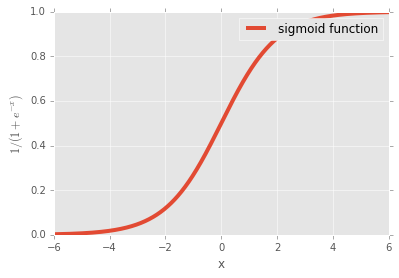

In [5]:
# We can also plot the sigmoids
x_0 = np.linspace(-6,6,1000)
y_0 = sigmoid_func(x_0)
plt.plot(x_0,y_0,label='sigmoid function',lw=4)
plt.legend()
plt.xlabel('x')
plt.ylabel('$1/(1+e^{-x})$')
plt.show()

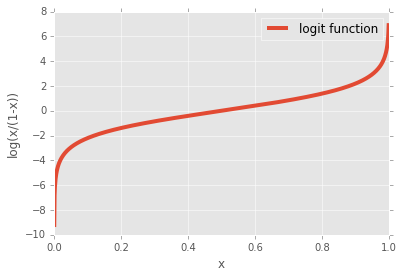

In [6]:
# ... and the logit functions.
x_1 = np.linspace(0.0001,0.999,1000)
y_1 = logit_func(x_1/(1-x_1))
plt.plot(x_1,y_1,label='logit function',lw=4)
plt.legend()
plt.xlabel('x')
plt.ylabel('log(x/(1-x))')
plt.show()

## Note: sklearn also has logistic regression:
```python
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X, y)
```

## Independent Practice: "Logistic regression implementation"
Use the data titanic.csv and the LogisticRegression estimator in sklearn to predict the target variable `survived`.

1. What is the bias, or prior probability, of the dataset?
2. Build a simple model with one feature and explore the coef_ value.  Does this represent the odds or logit (log odds)?
3. Build a more complicated model using multiple features. Interpreting the odds, which features have the most impact on survival? Which features have the least?
4. What is the accuracy of your model?

N.B. `age` will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

We first load the data and re-encode it so we can pass it into our model (we impute missing values and re-encode categorical data from string to booleans).

In [7]:
titanic = pd.read_csv('../../assets/dataset/titanic.csv')

# Transform male/female to 1/0
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

# Impute age using mean age for that sex & passenger class
titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))

# Turn parch and sibsp into binary 1/0 predictors
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)

# Dummy pclass and join as new cols
titanic = titanic.join(pd.get_dummies(titanic.Pclass, prefix='pclass'))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,had_parents,had_siblings,pclass_1,pclass_2,pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,1


In [8]:
# What's the baseline? (i.e. mean survival rate)
titanic.Survived.mean()

0.38383838383838381

In [9]:
# First let's build simple log-reg with one predictor
lr = LogisticRegression()
X = titanic[['is_male']]
y = titanic['Survived']
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# Simple accuracy score
print lr.score(X, y)

0.786756453423


In [11]:
# Find out how to print out the log-reg coefficients & intercept
# Docs: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
print "is_male coef = log(odds-ratio)) =", lr.coef_    # this coef is a log(odds-ratio), so a little meaningless!
print "log-reg intercept =", lr.intercept_

is_male coef = log(odds-ratio)) = [[-2.43010712]]
log-reg intercept = [ 1.00027876]


In [12]:
# Above suggests that log(OR) of survival for male vs female is -2.43
# Therefore odds-ratio of survival (male vs female) is np.exp(-2.43) = 0.088
print "exp(is_male coef) = odds-ratio (men vs women) =", np.exp(lr.coef_)

# Flipping this (1. / 0.0880274), this model suggests that odds of survival for female are
# a factor of 11.4 higher than odds of survival for men
print "odds-ratio (women vs men) =", 1./np.exp(lr.coef_)

exp(is_male coef) = odds-ratio (men vs women) = [[ 0.0880274]]
odds-ratio (women vs men) = [[ 11.3600989]]


In [13]:
# You can turn these into probabilities using the sigmoid function
# Remember logistic regression formula applies logit function to the probabilities of survival
# i.e. logit(p) = alpha + beta * x

# In this case, alpha is intercept, beta is coef, x is feature "is_male"

# So P(survived | female), read as "probability of survived, given this person is female" is found by setting x=0
# i.e. logit(p) = alpha + beta * 0
#               = alpha

# Remember then that sigmoid(logit(p)) = p, so P(survived | female) = sigmoid(alpha) = 73%
print "P(survived | female) =", sigmoid_func(lr.intercept_)
print "P(not survived | female) =", 1-sigmoid_func(lr.intercept_)

# Similarly, by setting x=1, we get probability of survival for men = sigmoid(alpha + beta * 1) = 19.5%
print "P(survived | male) =", sigmoid_func(lr.intercept_ + lr.coef_)
print "P(not survived | male) =", 1-sigmoid_func(lr.intercept_ + lr.coef_)

P(survived | female) = [ 0.73111338]
P(not survived | female) = [ 0.26888662]
P(survived | male) = [[ 0.19312543]]
P(not survived | male) = [[ 0.80687457]]


In [14]:
sigmoid_func(lr.intercept_+lr.coef_)*np.exp(-lr.intercept_-lr.coef_)

array([[ 0.80687457]])

In [16]:
# Handy function for creating the contingency table of survival vs gender
pd.crosstab(titanic['is_male'], titanic['Survived'])#, rownames=['is_male'])

Survived,0,1
is_male,,
0,81,233
1,468,109


In [17]:
# By hand...this is exactly the same as what we went through in class together
prob_survive_male = 109.0 / (468 + 109)
prob_survive_female = 233.0 / (81 + 233)
odds_survive_male = prob_survive_male / (1 - prob_survive_male)
odds_survive_female = prob_survive_female / (1 - prob_survive_female)
odds_ratio_male_female = odds_survive_male / odds_survive_female

print "Probability of surviving if male =", prob_survive_male  # 18.9% (notice difference already to above)
print "Probability of surviving if female =", prob_survive_female  # 74.2% (ditto)
print "Odds of surviving if male = {} : 1".format(odds_survive_male)  # 0.23:1, or approx 3:13 if you like integers
print "Odds of surviving if female = {} : 1".format(odds_survive_female)  # 2.88:1, or approx 26:9
print "Odds ratio of surviving (male vs female) =", odds_ratio_male_female  # 0.08
print "Odds ratio of surviving (female vs male) =", 1 / odds_ratio_male_female  # 12.4

# In English: "Women were roughly twelve times as likely as men to survive the Titanic."

Probability of surviving if male = 0.188908145581
Probability of surviving if female = 0.742038216561
Odds of surviving if male = 0.232905982906 : 1
Odds of surviving if female = 2.87654320988 : 1
Odds ratio of surviving (male vs female) = 0.0809673159459
Odds ratio of surviving (female vs male) = 12.3506625892


In [18]:
# So why the differences? I claimed regularisation...

# By way of example, let's just try changing between L1 and L2...
print "L1 odds ratio =", 1. / np.exp(LogisticRegression(penalty='l1').fit(X, y).coef_)
print "L2 odds ratio =", 1. / np.exp(LogisticRegression(penalty='l2').fit(X, y).coef_)

# And now let's turn regularisation off by weakening the "regularisation strength" parameter C...
print "L2 + weaker regularisation strength =", 1. / np.exp(LogisticRegression(penalty='l1', C=10000000).fit(X, y).coef_)

# Finally, note that each time you re-run this, the numbers will change. Under the hood, it's using an optimisation
# algorithm with a random initial starting point to fit the regularised logistic regression! So no small wonder the
# results for odds ratio are coming out as slightly different to the hand calculated odds!

# For more detail on scikit-learn's LogisticRegression object:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# For more detail on the relationship between log-reg coefs and hand-calculated ORs (inc. for multiclass case):
# http://stats.stackexchange.com/questions/35013/exponentiated-logistic-regression-coefficient-different-than-odds-ratio

L1 odds ratio = [[ 11.81280411]]
L2 odds ratio = [[ 11.3600989]]
L2 + weaker regularisation strength = [[ 12.34729199]]


In [19]:
# How does accuracy change depending on features?
X = titanic[['is_male']]
print "Accuracy using gender as only feature = ", LogisticRegression().fit(X, y).score(X, y)

# Using age (imputed for some individuals)
X = titanic[['Age']]
print "Accuracy using age as only feature = ", LogisticRegression().fit(X, y).score(X, y)

# Using lots of features
X = titanic[['is_male', 'Age', 'pclass_1', 'pclass_2', 'had_parents', 'had_siblings', 'Fare']]
print "Accuracy using all features = ", LogisticRegression().fit(X, y).score(X, y)

Accuracy using gender as only feature =  0.786756453423
Accuracy using age as only feature =  0.616161616162
Accuracy using all features =  0.802469135802


**Key takeaways:**
1. Being male decreases the odds of survival.
2. Women were roughly twelve times more likely than men to survive the Titanic.
3. A model built using only gender has 78.7% accuracy.
4. A model built using many features has 80.2% accuracy

## "Evaluating logistic regression with alternative metrics"
This Titanic dataset comes from [Kaggle](https://www.kaggle.com/c/titanic).

Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. For a worst case scenario, identify one or two strong features that would be useful to include in this model.


1. Spend 1-2 minutes considering which metric makes the most sense to optimise. Accuracy? FPR or TPR? AUC? Given the "business problem" of understanding survival rate aboard the Titanic, why should you use this metric?

2. Build a tuned logistic regression model. Be prepared to explain your design (including regularisation), choice of metric, and your chosen feature set in predicting survival using any tools necessary (such as fit charts). Use the starter code to get you going.

N.B. If you haven't done it yet, `age` will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

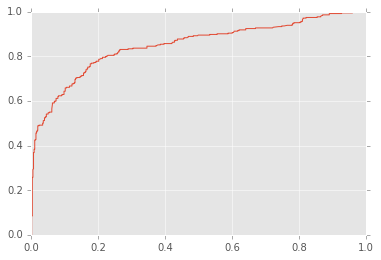

In [20]:
# Here's some code for fitting a model and creating a ROC
lr = LogisticRegression()
X = titanic[['is_male', 'Age', 'pclass_1', 'pclass_2', 'had_parents', 'had_siblings', 'Fare']]
y = titanic['Survived']
lr.fit(X, y)

predictions = lr.predict(X)
probabilities = lr.predict_proba(X)
plt.plot(roc_curve(titanic[['Survived']], probabilities[:,1])[0],
         roc_curve(titanic[['Survived']], probabilities[:,1])[1])
plt.show()

This ROC curve above is calculating TPR/FPR based on probabilities, as the discrimination threshold varies.

In [21]:
# To understand this a little further, try printing these in turn
#titanic[['survived']]
#probabilities
#probabilities[:,1]
roc_curve(titanic[['Survived']], probabilities[:,1])
#print roc_curve(titanic[['survived']], probabilities[:,1])[0]
#print roc_curve(titanic[['survived']], probabilities[:,1])[1]

(array([ 0.        ,  0.00182149,  0.00182149,  0.00182149,  0.00182149,
         0.00364299,  0.00364299,  0.00546448,  0.00546448,  0.00728597,
         0.00728597,  0.00728597,  0.00728597,  0.00910747,  0.00910747,
         0.01092896,  0.01092896,  0.01092896,  0.01092896,  0.01092896,
         0.01092896,  0.01275046,  0.01275046,  0.01457195,  0.01457195,
         0.01457195,  0.01639344,  0.01639344,  0.01821494,  0.01821494,
         0.02003643,  0.02003643,  0.02367942,  0.02367942,  0.03460838,
         0.03460838,  0.03642987,  0.03642987,  0.03642987,  0.04007286,
         0.04007286,  0.04189435,  0.04189435,  0.04371585,  0.04371585,
         0.04553734,  0.04553734,  0.05100182,  0.05100182,  0.05464481,
         0.05464481,  0.0582878 ,  0.06193078,  0.06193078,  0.06193078,
         0.06375228,  0.06375228,  0.06921676,  0.06921676,  0.07103825,
         0.07103825,  0.07468124,  0.07468124,  0.07468124,  0.07468124,
         0.08014572,  0.08014572,  0.08196721,  0.0

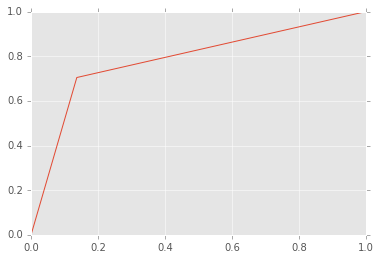

In [22]:
plt.plot(roc_curve(titanic[['Survived']], predictions)[0],
         roc_curve(titanic[['Survived']], predictions)[1])
plt.show()

This chart only has access to the prediction class labels, and is able to show the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [23]:
# Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).
roc_auc_score(titanic['Survived'], lr.predict(X))

0.78403317035758791

In [24]:
from sklearn.model_selection import GridSearchCV, KFold

# Full model from earlier
X = titanic[['is_male', 'Age', 'pclass_1', 'pclass_2', 'had_parents', 'had_siblings', 'Fare']]

# Use GridSearch to try different params for LogisticRegression;
# also using 10-fold CV to examine test set accuracy;
# also using AUC as our metric to maximise
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**i for i in range(-5, 5)],
                'class_weight': [None, 'balanced']},
    cv=KFold(n_splits=10),
    scoring='roc_auc'
)

gs.fit(X, y)
gs.cv_results_

{'mean_fit_time': array([ 0.01173267,  0.00404391,  0.00368733,  0.00372696,  0.00432711,
         0.00436351,  0.00414762,  0.00499179,  0.00504735,  0.00632126,
         0.00577803,  0.00531566,  0.0049299 ,  0.00491102,  0.00450809,
         0.00515673,  0.00483675,  0.00467868,  0.00458634,  0.0051702 ]),
 'mean_score_time': array([ 0.00090003,  0.00086238,  0.0008903 ,  0.00092137,  0.00090554,
         0.000807  ,  0.00086265,  0.00092788,  0.0010052 ,  0.00115602,
         0.00114257,  0.00111084,  0.00093246,  0.00086811,  0.00081069,
         0.00090334,  0.00083549,  0.00081191,  0.00082951,  0.00084419]),
 'mean_test_score': array([ 0.67106373,  0.70534239,  0.67996433,  0.70236158,  0.70905254,
         0.73557541,  0.80649823,  0.80081153,  0.8373741 ,  0.8355963 ,
         0.84018803,  0.83890275,  0.83909132,  0.83905509,  0.83893729,
         0.83910479,  0.83899611,  0.83905003,  0.83899611,  0.83905003]),
 'mean_train_score': array([ 0.67691942,  0.71050726,  0.683942

In [25]:
# instead of printing out a long dictionary of results, you can 
# read the results into a dataframe
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_class_weight,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.011733,0.000900,0.671064,0.676919,1e-05,None,"{u'C': 1e-05, u'class_weight': None}",20,0.544997,0.693308,...,0.691558,0.673763,0.736158,0.670784,0.670455,0.674117,0.024471,0.000218,0.058096,0.010494
1,0.004044,0.000862,0.705342,0.710507,1e-05,balanced,"{u'C': 1e-05, u'class_weight': u'balanced'}",17,0.531926,0.728598,...,0.736472,0.707451,0.750847,0.706695,0.748918,0.704714,0.000690,0.000120,0.077110,0.007918
2,0.003687,0.000890,0.679964,0.683942,0.0001,None,"{u'C': 0.0001, u'class_weight': None}",19,0.548014,0.700074,...,0.698052,0.681391,0.746328,0.678889,0.681277,0.680793,0.000695,0.000143,0.058522,0.008977
3,0.003727,0.000921,0.702362,0.708879,0.0001,balanced,"{u'C': 0.0001, u'class_weight': u'balanced'}",18,0.535948,0.725629,...,0.729437,0.706709,0.747458,0.705151,0.735390,0.704208,0.000539,0.000243,0.073463,0.007257
4,0.004327,0.000906,0.709053,0.715005,0.001,None,"{u'C': 0.001, u'class_weight': None}",16,0.589241,0.725092,...,0.715368,0.714895,0.772316,0.710528,0.711580,0.713169,0.001165,0.000239,0.054794,0.006311


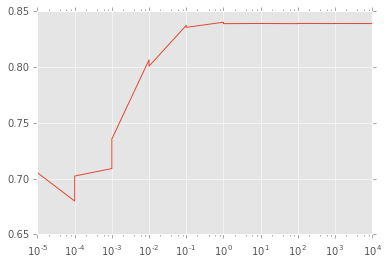

In [26]:
plt.plot(results['param_C'],results['mean_test_score'])
plt.xscale('log')

In [27]:
# extract the best model parameters
gs.best_params_

{'C': 1, 'class_weight': None}

In [28]:
# extract the best score obtained with the best model parameters
gs.best_score_

0.84018803262948383

In [29]:
# extract the best estimator
print gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Our best estimator uses C=1 and class_weight disabled, giving an AUC of 0.84 (interestingly, these are default settings). Note AUC changes from earlier, as we're now measuring AUC against a 10% test set.